# Abstract

In this experiment, we applied logistic regression with different  hyperparameter settings on the dataset NumtaDB. We got testing accuracy of 48% from the best model among four different model.

# Problem Definition

The main objective of this experiment is design a multiclass classification model that can recongnize Bengali handwritten digits with different hyperparameter settings from NumtaDB dataset. 

# Dataset

NumtaDB is Bengali Handwrittten digits dataset. This dataset is consist of two sub dataset: one is csv file and another is corresponding image dataset. CSV file has several columns and we only consider two columns(filename, digit/label) for our work purpose. The image dataset consist of 54809 grayscale images of 10 classes. We can consider one image in a array of 28\*28\*1 


**Snapshot from NumtaDB**

\\
<div align="center">
<img src="https://drive.google.com/uc?id=1LvkNwV1My2RniR_JsbasBET1fa97eMQu" width="500">
</div>

# WorkFlow of Methodology

I characterize the complete work flow into nine steps.

1. Preprocessing of CSV data and corresponding image data.
2. Normalize the input data.
3. Train-Test split.
4. Setting up hyperparameters.
5. Initialize Logistic regression model, loss and optimizer.
6. Training data and evaluation on testing data interms of loss and accuracy.
7. Save Model.
8. Build Multiclass classification model
9. Prediction of digits

# Preprocessing of Data
As earlier said  this dataset is a combination of five dataset.For training we have to merged the training image dataset and then merged the csv dataset. After that i process the image with csv dataset to attach images with labels. We apply normalization using pytorch transform function whih transform the image into tensor from and resize in 28*28 and the apply normalaize function to reduce computing cost during training.$image=(image-mean)/s.deviation$ where the value of mean and standard deviation is 0.5.

# Logistic Regression

Logistic regression is supervised machine learning classification algorithm.Though it is known as regression but the output of the algorithm is discrete value[0,1]. The goal of logistic regression is to minimize the error between its predictions and training data. This algorithm is pretty similar to linear regression but the difference is in logistic regression there used sigmoid activation function which made the decision boundary curved. As our experiment lies in multinomial logistic regression so we have to use softmax fuction.The difference between softmax and sigmoid is softmax is used for multiclass classification and sigmoid is used for binary classification.
$$s= \sigma(w^Tx+b)=\sigma(z)=\frac{1}{1+e^{-z}} $$

# Loss Function and Optimizer

In this experiment, cross entropy loss function is used. It calculates the summation of actual values and log calculation of softmax probabilities. I need not implement this loss function. I select it from Pytorch API.

$$\ J(w,b)=\frac{1}{m}\sum_{i=1}^{m} L(\bar{y^{i}},{y^i})=-\frac{1}{m}\sum_{i=1}^{m}[y^ilog(\bar{y^i})]$$



To optimize the loss function i used two types of optimizer:SGD and Adam with different learning rate and number of iteration.


# Experimental Setup

In this experiment i used pytorch API and google colab with various python packages: numpy, pandas, matplotlib. I got access pytorch version 1.7.0+cu101 with T4 Tesla GPU from colab. It takes more than 4 hour to complete the task.

# Train-Test Splitting Ratio

The entire dataset is splitted with proportion to 90:10 data are assinged randomly in training and testing data. Training dataset contains 49418 data and test data contains 5490 data.

# Result Analysis

I tried this experiment with different hyperparameter settings. Here i visualize the best three experimented settings.This models achieved accuracy of 40.74%, 38.61%, 40.38% and 48% respectively. 

**Hyper parameter settings**

| Settings 1       | Settings 2      | Settings 3     |  Settings 4  |
|:-------------    | :------------:  | :-----------:  | ----------:  |
|L_rate=0.01       | L_rate=0.001    | L_rate=0.0001  |L_rate=0.001  |
|Optimizer:SGD     | Optimizer:SGD   | Optimizer:Adam |Optimizer:Adam|   
|Batch_size=100    | Batch_size=100   | Batch_size=100 | Batch_size=100|
|num_iter=10000    | num_iter=25000   | num_iter=20000 | num_iter=25000|
|cross_entropy     | cross_entropy    | cross_entropy  |  cross_entropy||



# Result Comparison

**Loss Graphs**
<div align="center">
<div class="column">
  <img src="https://drive.google.com/uc?id=1HauQJnsh-Za-cxQHTunWc0o0zuyVoz6Q" width="700">
  </div>
  </div>

**Accuracy Graphs**
  <div align="center">
<div class="column">
  <img src="https://drive.google.com/uc?id=1ox7DZmbgf7GTYb9G6JxSpu6m5IsmavdI" width="700">
  </div>
  </div>


From the loss graphs, we can see the loss curve is decreasing in every loss function and optimizer but the curve is zigzag curve this might cause the loss function tried to achieve local optima. On the other hand the accuracy is increasing gradually but the accuracy is comapartively low because of nonlinear data and the logistic regression function. This accuracy might increase if it is trained on multy layer neural network model.


# Implementation/Code

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms, models
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
print(torch.__version__)

print(torch.cuda.get_device_name())

1.7.0+cu101
Tesla T4


In [ ]:
import os
import zipfile
from os import path
import shutil

local_zip = '/content/drive/MyDrive/numta.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/namta/namta')
zip_ref.close()



In [ ]:
import os
import zipfile
from os import path
import shutil

# Define data path
data_path = '/content/drive/MyDrive/numta/numta/'
data_dir_list = os.listdir(data_path)
print(data_dir_list)

['training-a', 'training-a.csv', 'training-c', 'training-c.csv', 'training-d', 'training-d.csv']


In [ ]:
def showRawTrainingSamples(csv_filename):
  df = pd.read_csv(data_path + csv_filename)
  print(csv_filename)
  print(df.columns)
  return df

In [ ]:
a_csv = showRawTrainingSamples('training-a.csv')
c_csv = showRawTrainingSamples('training-c.csv')
d_csv = showRawTrainingSamples('training-d.csv')

training-a.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')
training-c.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')
training-d.csv
Index(['original filename', 'scanid', 'digit', 'num', 'database name original',
       'database name', 'filename'],
      dtype='object')


In [ ]:
def dropColumns(csv_file):
  csv_file = csv_file[['filename', 'digit']]
  print(csv_file)
  print(csv_file.iloc[:5, :])   #First 5 Rows of the CSV File
  print("=============================")
  return csv_file

In [ ]:
a_csv = dropColumns(a_csv)
c_csv = dropColumns(c_csv)
d_csv = dropColumns(d_csv)

         filename  digit
0      a00000.png      5
1      a00001.png      3
2      a00002.png      1
3      a00003.png      7
4      a00004.png      0
...           ...    ...
19697  a19697.png      4
19698  a19698.png      3
19699  a19699.png      8
19700  a19700.png      3
19701  a19701.png      8

[19702 rows x 2 columns]
     filename  digit
0  a00000.png      5
1  a00001.png      3
2  a00002.png      1
3  a00003.png      7
4  a00004.png      0
         filename  digit
0      c00000.png      6
1      c00001.png      1
2      c00002.png      3
3      c00003.png      2
4      c00004.png      7
...           ...    ...
24293  c24293.png      3
24294  c24294.png      2
24295  c24295.png      7
24296  c24296.png      2
24297  c24297.png      7

[24298 rows x 2 columns]
     filename  digit
0  c00000.png      6
1  c00001.png      1
2  c00002.png      3
3  c00003.png      2
4  c00004.png      7
         filename  digit
0      d00000.png      1
1      d00001.png      1
2      d00002.png    

In [ ]:
total_csv = [a_csv, c_csv, d_csv]
#total_csv = [a_csv,d_csv]
merged_csv = pd.concat(total_csv)
print(len(merged_csv))


54908


In [ ]:
print(merged_csv)

         filename  digit
0      a00000.png      5
1      a00001.png      3
2      a00002.png      1
3      a00003.png      7
4      a00004.png      0
...           ...    ...
10903  d10903.png      8
10904  d10904.png      6
10905  d10905.png      1
10906  d10906.png      6
10907  d10907.png      1

[54908 rows x 2 columns]


In [ ]:
TRAIN_PATH = 'train'
os.mkdir(TRAIN_PATH)

In [ ]:
def processImages(folder_name):
  src = data_path + folder_name + '/'
  dir_folders = os.listdir(src)
  for dir_name in dir_folders:
    file_name = os.path.join(src, dir_name)
    if os.path.isfile(file_name):
      shutil.copy(file_name, TRAIN_PATH)  

In [ ]:
processImages('training-a')
print('A Done')
processImages('training-c')
print('C Done')
processImages('training-d')
print('D Done')

A Done
C Done
D Done


In [ ]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [ ]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Resize(28),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(merged_csv, TRAIN_PATH, train_transform)
test_data = Dataset(merged_csv, TRAIN_PATH, test_transform)

print("Trainig Samples: ",len(train_data))

Trainig Samples:  54908


In [ ]:
train_data[50]

(tensor([[[0.7804, 0.7804, 0.7804, 0.7882, 0.7804, 0.7804, 0.7804, 0.7804,
           0.7804, 0.7725, 0.7804, 0.7804, 0.7804, 0.7804, 0.7882, 0.7804,
           0.7804, 0.7804, 0.7804, 0.7804, 0.7882, 0.7804, 0.7882, 0.7882,
           0.7804, 0.7804, 0.7882, 0.7725],
          [0.7804, 0.7804, 0.7804, 0.7882, 0.7882, 0.7882, 0.7804, 0.7804,
           0.7804, 0.7882, 0.7804, 0.7804, 0.7804, 0.7804, 0.7804, 0.7804,
           0.7725, 0.7804, 0.7804, 0.7882, 0.7804, 0.7804, 0.7882, 0.7882,
           0.7804, 0.7725, 0.7725, 0.7725],
          [0.7804, 0.7804, 0.7804, 0.7804, 0.7804, 0.7804, 0.7804, 0.7804,
           0.7804, 0.7804, 0.7804, 0.7804, 0.7882, 0.7882, 0.7804, 0.7804,
           0.7804, 0.7804, 0.7804, 0.7804, 0.7804, 0.7725, 0.7804, 0.7804,
           0.7804, 0.7725, 0.7725, 0.7725],
          [0.7804, 0.7804, 0.7804, 0.7804, 0.7804, 0.7804, 0.7804, 0.7804,
           0.7804, 0.7804, 0.7725, 0.7804, 0.7804, 0.7804, 0.7804, 0.7804,
           0.7804, 0.7804, 0.7804, 0.7804, 

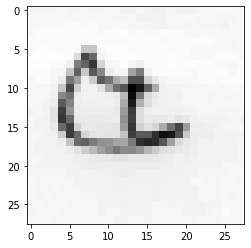

In [ ]:
## Displaying a MNIST Image

import matplotlib.pyplot as plt 
import numpy as np

show_img = train_data[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

In [ ]:
# One Image Size
print(train_data[50][0].size())
print(train_data[50][0].numpy().shape)
# First Image Label
print(train_data[50][1])

torch.Size([1, 28, 28])
(1, 28, 28)
1


In [ ]:
#batch size
#batch_size = 32
batch_size = 100
# split data 20% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:495
Test dataloader:55


In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

# Settings 1

In [ ]:
# Hyperparameters

num_iters = 10000
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.01

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
# INSTANTIATE OPTIMIZER CLASS

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
num_iters=10000
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
#num_epochs=20
iteration_loss = []
iteration_accuracy=[]
iter = 0
for epoch in range(num_epochs):
    for i,(images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            iteration_accuracy.append(accuracy)
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.237647771835327. Accuracy: 26.539162112932605
Iteration: 1000. Loss: 2.0822412967681885. Accuracy: 30.29143897996357
Iteration: 1500. Loss: 2.010157823562622. Accuracy: 27.577413479052822
Iteration: 2000. Loss: 2.0829107761383057. Accuracy: 36.411657559198545
Iteration: 2500. Loss: 2.040388345718384. Accuracy: 36.59380692167577
Iteration: 3000. Loss: 1.9649059772491455. Accuracy: 37.5591985428051
Iteration: 3500. Loss: 2.014690399169922. Accuracy: 38.233151183970854
Iteration: 4000. Loss: 1.9133251905441284. Accuracy: 37.431693989071036
Iteration: 4500. Loss: 2.097909927368164. Accuracy: 38.68852459016394
Iteration: 5000. Loss: 1.9574588537216187. Accuracy: 40.74681238615665
Iteration: 5500. Loss: 2.0040504932403564. Accuracy: 39.5264116575592
Iteration: 6000. Loss: 1.826127529144287. Accuracy: 41.202185792349724
Iteration: 6500. Loss: 1.9897544384002686. Accuracy: 40.783242258652095
Iteration: 7000. Loss: 1.790816307067871. Accuracy: 38.05100182149363
Iteration

[2.237647771835327, 2.0822412967681885, 2.010157823562622, 2.0829107761383057, 2.040388345718384, 1.9649059772491455, 2.014690399169922, 1.9133251905441284, 2.097909927368164, 1.9574588537216187, 2.0040504932403564, 1.826127529144287, 1.9897544384002686, 1.790816307067871, 1.9453516006469727, 1.7386282682418823, 1.8430241346359253]


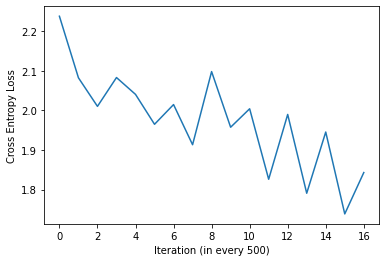

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[26.539162112932605, 30.29143897996357, 27.577413479052822, 36.411657559198545, 36.59380692167577, 37.5591985428051, 38.233151183970854, 37.431693989071036, 38.68852459016394, 40.74681238615665, 39.5264116575592, 41.202185792349724, 40.783242258652095, 38.05100182149363, 40.837887067395265, 39.96357012750455, 40.74681238615665]


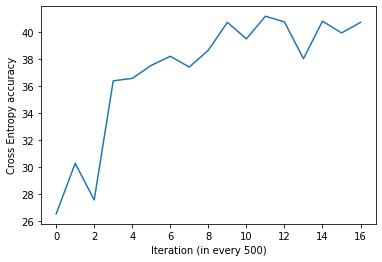

In [ ]:
print (iteration_accuracy)
plt.plot(iteration_accuracy)
plt.ylabel('Cross Entropy accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
root_path = '/content/drive/My Drive/Assignment/'

In [ ]:
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'NumtaDB_logistic_3.pkl')

In [ ]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'NumtaDB_logistic_3.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


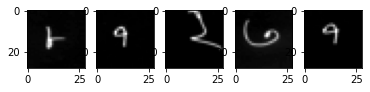

In [ ]:
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(images[i].view(28, 28), cmap=matplotlib.cm.binary)

plt.show()

In [ ]:
_, predictions = model.forward(images[:5].view(-1, 28*28).to(device))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions.cpu().numpy())

Predicted labels [8 7 3 3 7]


# Settings 2

In [ ]:
# Hyperparameters

num_iters = 25000
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
# INSTANTIATE OPTIMIZER CLASS

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
num_iters = 25000
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
#num_epochs=20
iteration_loss = []
iteration_accuracy=[]
iter = 0
for epoch in range(num_epochs):
    for i,(images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            iteration_accuracy.append(accuracy)
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.2782983779907227. Accuracy: 12.568306010928962
Iteration: 1000. Loss: 2.2846243381500244. Accuracy: 12.076502732240437
Iteration: 1500. Loss: 2.271756649017334. Accuracy: 18.77959927140255
Iteration: 2000. Loss: 2.2564125061035156. Accuracy: 18.979963570127506
Iteration: 2500. Loss: 2.24495005607605. Accuracy: 23.224043715846996
Iteration: 3000. Loss: 2.259458541870117. Accuracy: 21.821493624772312
Iteration: 3500. Loss: 2.225309133529663. Accuracy: 28.615664845173043
Iteration: 4000. Loss: 2.2268452644348145. Accuracy: 25.081967213114755
Iteration: 4500. Loss: 2.222311019897461. Accuracy: 31.51183970856102
Iteration: 5000. Loss: 2.1927454471588135. Accuracy: 27.140255009107467
Iteration: 5500. Loss: 2.205935001373291. Accuracy: 30.036429872495447
Iteration: 6000. Loss: 2.206465244293213. Accuracy: 33.1511839708561
Iteration: 6500. Loss: 2.1961536407470703. Accuracy: 32.47723132969035
Iteration: 7000. Loss: 2.1671478748321533. Accuracy: 32.22222222222222
Iterati

[2.2782983779907227, 2.2846243381500244, 2.271756649017334, 2.2564125061035156, 2.24495005607605, 2.259458541870117, 2.225309133529663, 2.2268452644348145, 2.222311019897461, 2.1927454471588135, 2.205935001373291, 2.206465244293213, 2.1961536407470703, 2.1671478748321533, 2.1900718212127686, 2.1758718490600586, 2.219764232635498, 2.1508312225341797, 2.1238653659820557, 2.131054162979126, 2.212568521499634, 2.1237752437591553, 2.0839149951934814, 2.146822929382324, 2.0877621173858643, 2.090622663497925, 2.0788373947143555, 2.065668821334839, 2.150928258895874, 2.044994354248047, 2.0747363567352295, 2.0684332847595215, 2.042250156402588, 2.046079635620117, 2.0959393978118896, 2.044146776199341, 2.0512425899505615, 2.0536599159240723, 2.0970849990844727, 2.046358108520508, 2.087632656097412, 2.0438168048858643, 2.0637948513031006, 2.050100564956665]


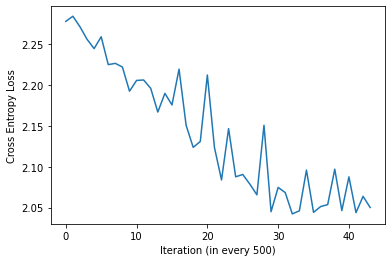

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[12.568306010928962, 12.076502732240437, 18.77959927140255, 18.979963570127506, 23.224043715846996, 21.821493624772312, 28.615664845173043, 25.081967213114755, 31.51183970856102, 27.140255009107467, 30.036429872495447, 33.1511839708561, 32.47723132969035, 32.22222222222222, 34.69945355191257, 34.86338797814208, 33.387978142076506, 35.865209471766846, 33.82513661202186, 35.02732240437158, 35.974499089253186, 33.78870673952641, 33.697632058287795, 35.71948998178507, 35.6648451730419, 34.82695810564663, 34.681238615664846, 37.66848816029144, 36.39344262295082, 36.92167577413479, 36.557377049180324, 35.974499089253186, 36.68488160291439, 37.35883424408014, 36.12021857923497, 37.74134790528233, 37.978142076502735, 37.650273224043715, 37.19489981785064, 37.57741347905282, 36.885245901639344, 37.30418943533698, 37.94171220400729, 38.61566484517304]


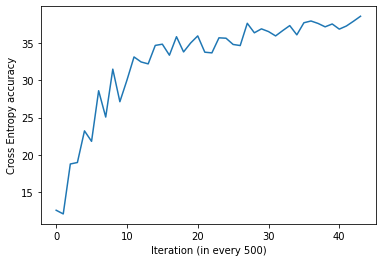

In [ ]:
print (iteration_accuracy)
plt.plot(iteration_accuracy)
plt.ylabel('Cross Entropy accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

**Save Model**

In [ ]:
root_path = '/content/drive/My Drive/Assignment/'

In [ ]:
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'NumtaDB_logistic_2.pkl')

**Load Model and Predict**

In [ ]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'NumtaDB_logistic_2.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


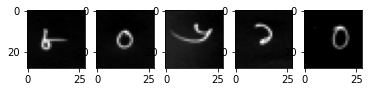

In [ ]:
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(images[i].view(28, 28), cmap=matplotlib.cm.binary)

plt.show()

In [ ]:
_, predictions = model.forward(images[:5].view(-1, 28*28).to(device))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions.cpu().numpy())

Predicted labels [8 0 6 1 3]


# Settings 3


In [ ]:
# Hyperparameters

num_iters = 20000
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.0001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
# INSTANTIATE OPTIMIZER CLASS

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
num_iters = 20000
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
#num_epochs=20
iteration_loss = []
iteration_accuracy=[]
iter = 0
for epoch in range(num_epochs):
    for i,(images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            iteration_accuracy.append(accuracy)
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.2654128074645996. Accuracy: 18.214936247723134
Iteration: 1000. Loss: 2.2124013900756836. Accuracy: 19.981785063752277
Iteration: 1500. Loss: 2.2298173904418945. Accuracy: 19.744990892531877
Iteration: 2000. Loss: 2.183539628982544. Accuracy: 34.00728597449909
Iteration: 2500. Loss: 2.088510751724243. Accuracy: 32.71402550091074
Iteration: 3000. Loss: 2.1330177783966064. Accuracy: 33.29690346083789
Iteration: 3500. Loss: 2.125211000442505. Accuracy: 35.55555555555556
Iteration: 4000. Loss: 2.055210590362549. Accuracy: 36.466302367941715
Iteration: 4500. Loss: 2.0877878665924072. Accuracy: 34.66302367941712
Iteration: 5000. Loss: 2.0518136024475098. Accuracy: 36.5391621129326
Iteration: 5500. Loss: 2.026521921157837. Accuracy: 36.63023679417122
Iteration: 6000. Loss: 2.081747531890869. Accuracy: 35.99271402550091
Iteration: 6500. Loss: 1.940467119216919. Accuracy: 37.0856102003643
Iteration: 7000. Loss: 1.9620559215545654. Accuracy: 38.451730418943534
Iteration: 

[2.2654128074645996, 2.2124013900756836, 2.2298173904418945, 2.183539628982544, 2.088510751724243, 2.1330177783966064, 2.125211000442505, 2.055210590362549, 2.0877878665924072, 2.0518136024475098, 2.026521921157837, 2.081747531890869, 1.940467119216919, 1.9620559215545654, 1.9260188341140747, 1.962401270866394, 1.8956724405288696, 1.9350510835647583, 1.974446415901184, 1.912203073501587, 1.9960943460464478, 1.885817527770996, 1.855926513671875, 1.851416826248169, 1.9282214641571045, 2.00600528717041, 1.8121745586395264, 1.920831322669983, 1.9545767307281494, 1.9395862817764282, 1.936037302017212, 1.838061809539795, 1.9234919548034668, 1.8476604223251343, 1.7501587867736816]


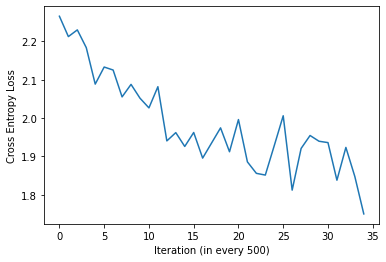

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[18.214936247723134, 19.981785063752277, 19.744990892531877, 34.00728597449909, 32.71402550091074, 33.29690346083789, 35.55555555555556, 36.466302367941715, 34.66302367941712, 36.5391621129326, 36.63023679417122, 35.99271402550091, 37.0856102003643, 38.451730418943534, 36.22950819672131, 38.451730418943534, 38.68852459016394, 38.233151183970854, 40.0, 37.94171220400729, 38.48816029143898, 39.98178506375228, 39.47176684881603, 40.34608378870674, 40.455373406193075, 41.32969034608379, 40.400728597449906, 40.400728597449906, 40.91074681238616, 40.63752276867031, 41.12932604735884, 40.10928961748634, 41.98542805100182, 41.202185792349724, 40.38251366120219]


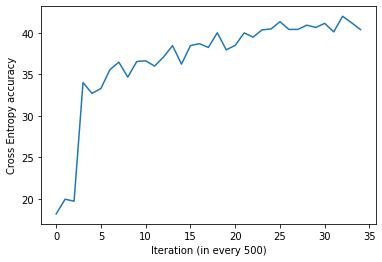

In [ ]:
print (iteration_accuracy)
plt.plot(iteration_accuracy)
plt.ylabel('Cross Entropy accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

**Saving Model**

In [ ]:
root_path = '/content/drive/My Drive/Assignment/'

In [ ]:
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'NumtaDB_logistic_1.pkl')

**Load Model and Predict**

In [ ]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'NumtaDB_logistic_1.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


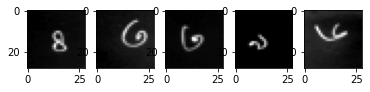

In [ ]:
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(images[i].view(28, 28), cmap=matplotlib.cm.binary)

plt.show()

In [ ]:
_, predictions = model.forward(images[:5].view(-1, 28*28).to(device))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions.cpu().numpy())

Predicted labels [4 3 3 2 6]


# Settings 4

In [ ]:
# Hyperparameters

num_iters = 25000
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
# INSTANTIATE OPTIMIZER CLASS

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
num_iters=25000
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
#num_epochs=20
iteration_loss = []
iteration_accuracy=[]
iter = 0
for epoch in range(num_epochs):
    for i,(images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            iteration_accuracy.append(accuracy)
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.1022846698760986. Accuracy: 28.852459016393443
Iteration: 1000. Loss: 2.096132278442383. Accuracy: 32.349726775956285
Iteration: 1500. Loss: 1.9226287603378296. Accuracy: 35.591985428051004
Iteration: 2000. Loss: 1.9426960945129395. Accuracy: 38.797814207650276
Iteration: 2500. Loss: 2.01287841796875. Accuracy: 38.77959927140255
Iteration: 3000. Loss: 1.8556451797485352. Accuracy: 37.17668488160292
Iteration: 3500. Loss: 1.8285953998565674. Accuracy: 40.34608378870674
Iteration: 4000. Loss: 1.9923999309539795. Accuracy: 40.98360655737705
Iteration: 4500. Loss: 1.9299836158752441. Accuracy: 41.38433515482696
Iteration: 5000. Loss: 1.7021076679229736. Accuracy: 40.564663023679415
Iteration: 5500. Loss: 1.8428280353546143. Accuracy: 41.657559198542806
Iteration: 6000. Loss: 1.9763439893722534. Accuracy: 43.67941712204007
Iteration: 6500. Loss: 1.7265123128890991. Accuracy: 40.76502732240437
Iteration: 7000. Loss: 1.8585481643676758. Accuracy: 43.78870673952641
Iter

[2.1022846698760986, 2.096132278442383, 1.9226287603378296, 1.9426960945129395, 2.01287841796875, 1.8556451797485352, 1.8285953998565674, 1.9923999309539795, 1.9299836158752441, 1.7021076679229736, 1.8428280353546143, 1.9763439893722534, 1.7265123128890991, 1.8585481643676758, 1.8102736473083496, 1.9271421432495117, 1.673996090888977, 1.6633026599884033, 1.847864031791687, 1.800041675567627, 1.8935786485671997, 1.8638546466827393, 1.744131326675415, 1.8851650953292847, 1.7718501091003418, 1.6771963834762573, 1.6608917713165283, 1.854557752609253, 2.0438530445098877, 1.800571322441101, 1.738742470741272, 1.6210603713989258, 1.5983211994171143, 1.663317084312439, 1.8860336542129517, 1.5012142658233643, 1.9609065055847168, 1.6778548955917358, 1.815293550491333, 1.8621971607208252, 1.7630001306533813, 1.908095121383667, 2.0367255210876465, 1.7368038892745972]


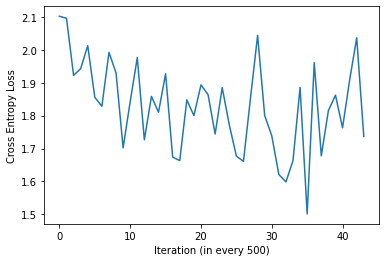

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[28.852459016393443, 32.349726775956285, 35.591985428051004, 38.797814207650276, 38.77959927140255, 37.17668488160292, 40.34608378870674, 40.98360655737705, 41.38433515482696, 40.564663023679415, 41.657559198542806, 43.67941712204007, 40.76502732240437, 43.78870673952641, 44.134790528233154, 43.442622950819676, 44.04371584699454, 44.24408014571949, 45.71948998178507, 45.373406193078324, 45.46448087431694, 43.71584699453552, 44.571948998178506, 43.18761384335155, 45.13661202185792, 44.97267759562842, 44.15300546448088, 44.462659380692166, 44.29872495446266, 46.86703096539162, 45.22768670309654, 46.721311475409834, 47.66848816029144, 46.79417122040073, 42.349726775956285, 42.55009107468124, 45.318761384335154, 44.93624772313297, 46.083788706739526, 47.19489981785064, 47.704918032786885, 44.735883424408016, 41.056466302367944, 48.178506375227684]


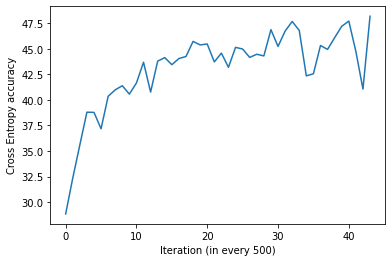

In [ ]:
print (iteration_accuracy)
plt.plot(iteration_accuracy)
plt.ylabel('Cross Entropy accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

**Save Model**

In [ ]:
root_path = '/content/drive/My Drive/Assignment/'

In [ ]:
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'NumtaDB_logistic_4.pkl')

**Load Model and Predict**

In [ ]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'NumtaDB_logistic_4.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


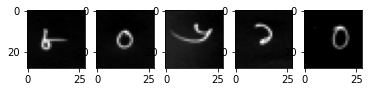

In [ ]:
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(images[i].view(28, 28), cmap=matplotlib.cm.binary)

plt.show()

In [ ]:
_, predictions = model.forward(images[:5].view(-1, 28*28).to(device))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions.cpu().numpy())

Predicted labels [8 0 6 1 3]


# Limitations/Problem faced during working

NumtaDB is a combination of 5 sub dataset. When working with this dataset, in some cases image data index and csv file index is not matched and getting error. For this reason i have to use reduced dataset.

# Conclusion

From the above observation we can come to a conclusion that the models accuracy is comparatively lower in different hyperparameter settings. This is because the dataset is highly non linear dataset but our model is built with logistic regression which is a simple regression model which perform better in linear dataset. We might get better accuracy if we experiment on neural network model.